In [1]:
import pandas as pd
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.compose import ColumnTransformer
import keras

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

import os

import math


from tensorflow.keras.utils import Sequence
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import datetime as dt

import warnings
warnings.filterwarnings('ignore')
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)  # turn off deprecation warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


2023-05-04 17:06:40.353938: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-04 17:06:40.417293: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-04 17:06:40.418599: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-04 17:06:41.380323: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Hour Dataset


In [2]:
df = pd.read_csv('../../data/latest_hour_final_ada.csv')

In [3]:
df

,Unnamed: 0,datetime,open,high,low,close,volume,close_time,qav,num_trades,...,macd,macd_diff,macd_signal,mi,sma,wma,stc,vi_pos,vi_neg,DATE
0,719,1612065600000,0.35982,0.36223,0.35850,0.36108,8867294.8,1612069199999,3.197565e+06,6379,...,0.009323,0.002069,0.007253,121.528331,0.351964,0.346690,99.998475,1.044513,0.961300,2021-01-31
1,720,1612069200000,0.36112,0.36116,0.35509,0.35756,14539762.3,1612072799999,5.200204e+06,9199,...,0.009206,0.001709,0.007497,121.415106,0.352217,0.346728,99.999237,1.033405,0.959307,2021-01-31
2,721,1612072800000,0.35750,0.35887,0.35537,0.35595,9714173.5,1612076399999,3.467982e+06,6615,...,0.009011,0.001325,0.007687,121.262170,0.352443,0.346757,49.999619,1.054651,0.962880,2021-01-31
3,722,1612076400000,0.35593,0.35993,0.35440,0.35605,16141914.5,1612079999999,5.760353e+06,9656,...,0.008828,0.000998,0.007829,121.118964,0.352705,0.346786,24.999809,1.045537,0.961455,2021-01-31
4,723,1612080000000,0.35597,0.35847,0.35300,0.35589,16108397.5,1612083599999,5.734942e+06,10401,...,0.008641,0.000711,0.007931,121.008679,0.352895,0.346813,12.499905,1.045535,0.959192,2021-01-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19425,20234,1682348400000,0.38980,0.39060,0.38530,0.38630,5602689.8,1682351999999,2.170127e+06,5271,...,-0.009556,0.000862,-0.010418,118.778613,0.390117,0.412824,99.006951,0.933661,1.032760,2023-04-24
19426,20235,1682352000000,0.38630,0.38800,0.38060,0.38180,6411740.6,1682355599999,2.467979e+06,6552,...,-0.009736,0.000597,-0.010333,118.902339,0.390037,0.412642,49.503475,0.923628,1.047733,2023-04-24
19427,20236,1682355600000,0.38170,0.38610,0.38000,0.38500,8468520.7,1682359199999,3.244859e+06,6643,...,-0.009738,0.000520,-0.010258,119.037727,0.389982,0.412478,24.751738,0.923254,1.041443,2023-04-24
19428,20237,1682359200000,0.38500,0.38800,0.38170,0.38320,3720628.3,1682362799999,1.431089e+06,4148,...,-0.009816,0.000387,-0.010203,119.208784,0.389940,0.412304,12.375869,0.932292,1.037202,2023-04-24


In [4]:

df.drop(columns=['Unnamed: 0','datetime','DATE'], inplace=True)
df

,open,high,low,close,volume,close_time,qav,num_trades,taker_base_vol,taker_quote_vol,...,ichimoku_conversion_line,macd,macd_diff,macd_signal,mi,sma,wma,stc,vi_pos,vi_neg
0,0.35982,0.36223,0.35850,0.36108,8867294.8,1612069199999,3.197565e+06,6379,4045221.6,1.458687e+06,...,0.367625,0.009323,0.002069,0.007253,121.528331,0.351964,0.346690,99.998475,1.044513,0.961300
1,0.36112,0.36116,0.35509,0.35756,14539762.3,1612072799999,5.200204e+06,9199,6975854.8,2.494905e+06,...,0.366305,0.009206,0.001709,0.007497,121.415106,0.352217,0.346728,99.999237,1.033405,0.959307
2,0.35750,0.35887,0.35537,0.35595,9714173.5,1612076399999,3.467982e+06,6615,4731988.3,1.689141e+06,...,0.366305,0.009011,0.001325,0.007687,121.262170,0.352443,0.346757,49.999619,1.054651,0.962880
3,0.35593,0.35993,0.35440,0.35605,16141914.5,1612079999999,5.760353e+06,9656,7994801.2,2.854066e+06,...,0.365960,0.008828,0.000998,0.007829,121.118964,0.352705,0.346786,24.999809,1.045537,0.961455
4,0.35597,0.35847,0.35300,0.35589,16108397.5,1612083599999,5.734942e+06,10401,7093561.2,2.526879e+06,...,0.365260,0.008641,0.000711,0.007931,121.008679,0.352895,0.346813,12.499905,1.045535,0.959192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19425,0.38980,0.39060,0.38530,0.38630,5602689.8,1682351999999,2.170127e+06,5271,2919310.5,1.130586e+06,...,0.388000,-0.009556,0.000862,-0.010418,118.778613,0.390117,0.412824,99.006951,0.933661,1.032760
19426,0.38630,0.38800,0.38060,0.38180,6411740.6,1682355599999,2.467979e+06,6552,3202537.0,1.233088e+06,...,0.387350,-0.009736,0.000597,-0.010333,118.902339,0.390037,0.412642,49.503475,0.923628,1.047733
19427,0.38170,0.38610,0.38000,0.38500,8468520.7,1682359199999,3.244859e+06,6643,4279567.3,1.641234e+06,...,0.387050,-0.009738,0.000520,-0.010258,119.037727,0.389982,0.412478,24.751738,0.923254,1.041443
19428,0.38500,0.38800,0.38170,0.38320,3720628.3,1682362799999,1.431089e+06,4148,1638952.0,6.307198e+05,...,0.387050,-0.009816,0.000387,-0.010203,119.208784,0.389940,0.412304,12.375869,0.932292,1.037202


In [5]:
scaler = MinMaxScaler()


# Fit the scaler on your dataframe (let's say it's called df)
df_normalized = scaler.fit_transform(df)

# Convert the normalized data back to a dataframe
df_normalized = pd.DataFrame(df_normalized, columns=df.columns)

In [6]:

# Convert the DataFrame to a NumPy array
raw_data = df_normalized.values
close = df_normalized['close'].values
close = close.reshape((len(close),1))
# Display the NumPy array
print(type(raw_data))
print(raw_data.shape)
print(close.shape)

<class 'numpy.ndarray'>
(19430, 72)
(19430, 1)


## Prepare Model

In [7]:
print('Prep Data')
num_train_samples = int(0.6 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)


Prep Data
num_train_samples: 11658
num_val_samples: 4857
num_test_samples: 2915


## 1 Hour Ahead

In [8]:
# Set Parameters

# delay: time in future that will be predicted
delay = 1


# sampling rate: period between timesteps within the sequence
# Sequence with rate=1 : t1,t2...tn
# Sequence with rate=3 : t1,t3...tn*3
sampling_rate = 2

# sequence length: sequence lenght of each sample 
sequence_length = 4 * 24


# sequence_stride: period between sequences
# First sequence starts at t0
# Second sequence will start at t1 with sequence_stride=1 or at t5 with sequence_stride=5
sequence_stride = 1

#batch_size: Number of timeseries samples in each batch (except maybe the last one). 
#If None, the data will not be batched (the dataset will yield individual samples).
# Huge impact in performance.
# Tip, should be multiple of 8
batch_size = 32

# Understanding our parameters
msg = f"The timeseries will consist of batches containing {batch_size} sequences of {sequence_length} samples."

msg += f"\nFinally our target is {delay} timesteps in the future, and will have data from {sequence_length * sampling_rate} timesteps in the past"
print(msg)

train_dataset = keras.preprocessing.timeseries_dataset_from_array(
                        raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False, # Shouldn't the shuffle be set to 0?
                    seed=33,
                    batch_size=batch_size,
                    start_index=0,
                    end_index=num_train_samples)

print("Done Train")

val_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False,
                    seed=33,
                    batch_size=batch_size,
                    start_index=num_train_samples,
                    end_index=num_train_samples + num_val_samples)

print("Done Validation")      

test_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False,
                    seed=33,
                    batch_size=batch_size,
                    start_index=num_train_samples + num_val_samples)

print("Done Test")

The timeseries will consist of batches containing 32 sequences of 96 samples.
Finally our target is 1 timesteps in the future, and will have data from 192 timesteps in the past
Done Train
Done Validation
Done Test


In [9]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(32)(inputs) 


outputs = layers.Dense(1)(x) #simoidal #con n clases neurnas y funcion softmax
model = keras.Model(inputs, outputs)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

callbacks = [
    keras.callbacks.ModelCheckpoint("models/lstm",
   save_best_only=True) 
]

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

history = model.fit(train_dataset,
                    epochs=100,
                    validation_data=val_dataset,
                    callbacks=[callbacks, early_stopping])

# Save the trained model to a file
model.save('lstm_model_1_ahead.h5')

Epoch 1/100


2023-05-04 17:06:43.407538: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 17:06:43.409303: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 17:06:43.410593: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

359/359 [==============================] - ETA: 0s - loss: 0.0041 - mae: 0.0468

2023-05-04 17:06:58.372028: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2023-05-04 17:06:58.375146: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [4666]
	 [[{{node Placeholder/_28}}]]
2023-05-04 17:06:58.727251: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int3

359/359 [==============================] - 21s 53ms/step - loss: 0.0041 - mae: 0.0468 - val_loss: 9.7272e-04 - val_mae: 0.0255
Epoch 2/100
359/359 [==============================] - 14s 40ms/step - loss: 0.0014 - mae: 0.0284 - val_loss: 0.0011 - val_mae: 0.0266
Epoch 3/100
359/359 [==============================] - 14s 39ms/step - loss: 0.0012 - mae: 0.0252 - val_loss: 0.0012 - val_mae: 0.0289
Epoch 4/100
359/359 [==============================] - 14s 38ms/step - loss: 0.0012 - mae: 0.0249 - val_loss: 0.0019 - val_mae: 0.0373
Epoch 5/100
359/359 [==============================] - 14s 40ms/step - loss: 0.0012 - mae: 0.0249 - val_loss: 0.0023 - val_mae: 0.0422
Epoch 6/100
359/359 [==============================] - 15s 41ms/step - loss: 0.0012 - mae: 0.0250 - val_loss: 0.0025 - val_mae: 0.0444


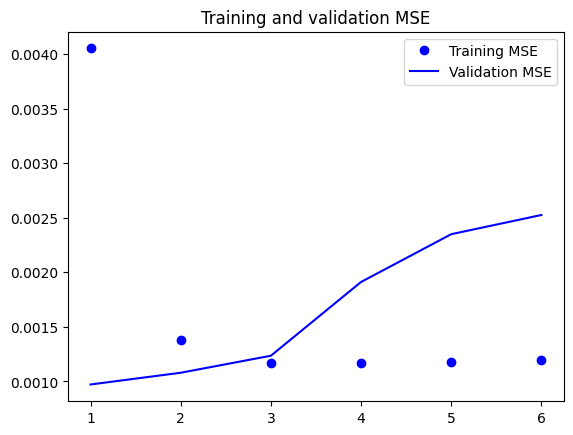

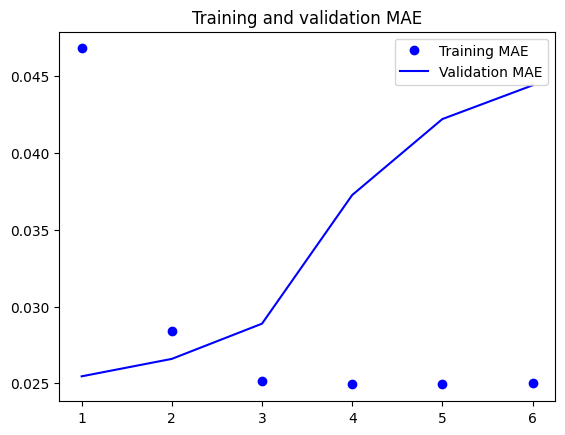

In [10]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MSE")
plt.plot(epochs, val_loss, "b", label="Validation MSE")
plt.title("Training and validation MSE")
plt.legend()
plt.show()
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

## 3 Hour Ahead

In [11]:
# Set Parameters

# delay: time in future that will be predicted
delay = 3


# sampling rate: period between timesteps within the sequence
# Sequence with rate=1 : t1,t2...tn
# Sequence with rate=3 : t1,t3...tn*3
sampling_rate = 2

# sequence length: sequence lenght of each sample 
sequence_length = 4 * 24


# sequence_stride: period between sequences
# First sequence starts at t0
# Second sequence will start at t1 with sequence_stride=1 or at t5 with sequence_stride=5
sequence_stride = 1

#batch_size: Number of timeseries samples in each batch (except maybe the last one). 
#If None, the data will not be batched (the dataset will yield individual samples).
# Huge impact in performance.
# Tip, should be multiple of 8
batch_size = 32

# Understanding our parameters
msg = f"The timeseries will consist of batches containing {batch_size} sequences of {sequence_length} samples."

msg += f"\nFinally our target is {delay} timesteps in the future, and will have data from {sequence_length * sampling_rate} timesteps in the past"
print(msg)

train_dataset = keras.preprocessing.timeseries_dataset_from_array(
                        raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False, # Shouldn't the shuffle be set to 0?
                    seed=33,
                    batch_size=batch_size,
                    start_index=0,
                    end_index=num_train_samples)

print("Done Train")

val_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False,
                    seed=33,
                    batch_size=batch_size,
                    start_index=num_train_samples,
                    end_index=num_train_samples + num_val_samples)

print("Done Validation")      

test_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False,
                    seed=33,
                    batch_size=batch_size,
                    start_index=num_train_samples + num_val_samples)

print("Done Test")

The timeseries will consist of batches containing 32 sequences of 96 samples.
Finally our target is 3 timesteps in the future, and will have data from 192 timesteps in the past
Done Train
Done Validation
Done Test


In [12]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(32)(inputs) 


outputs = layers.Dense(1)(x) #simoidal #con n clases neurnas y funcion softmax
model = keras.Model(inputs, outputs)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

callbacks = [
    keras.callbacks.ModelCheckpoint("models/lstm",
   save_best_only=True) 
]

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

history = model.fit(train_dataset,
                    epochs=100,
                    validation_data=val_dataset,
                    callbacks=[callbacks, early_stopping])

# Save the trained model to a file
model.save('lstm_model_3_ahead.h5')

Epoch 1/100


2023-05-04 17:08:17.050891: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 17:08:17.052601: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 17:08:17.053924: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

357/359 [============================>.] - ETA: 0s - loss: 0.0038 - mae: 0.0447

2023-05-04 17:08:32.459050: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2023-05-04 17:08:32.460414: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype double and shape [4857,1]
	 [[{{node Placeholder/_20}}]]
2023-05-04 17:08:32.787994: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype i

359/359 [==============================] - 21s 52ms/step - loss: 0.0038 - mae: 0.0447 - val_loss: 0.0014 - val_mae: 0.0342
Epoch 2/100
359/359 [==============================] - ETA: 0s - loss: 0.0014 - mae: 0.0272

2023-05-04 17:08:53.436151: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 17:08:53.442962: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 17:08:53.444437: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

359/359 [==============================] - 19s 54ms/step - loss: 0.0014 - mae: 0.0272 - val_loss: 0.0013 - val_mae: 0.0324
Epoch 3/100
359/359 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0249

2023-05-04 17:10:29.168498: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 17:10:29.170322: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 17:10:29.171726: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

359/359 [==============================] - 95s 264ms/step - loss: 0.0012 - mae: 0.0249 - val_loss: 9.5922e-04 - val_mae: 0.0262
Epoch 4/100
359/359 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0245

2023-05-04 17:10:47.401939: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 17:10:47.403814: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 17:10:47.405255: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

359/359 [==============================] - 18s 49ms/step - loss: 0.0012 - mae: 0.0245 - val_loss: 8.8459e-04 - val_mae: 0.0243
Epoch 5/100
359/359 [==============================] - 13s 37ms/step - loss: 0.0012 - mae: 0.0245 - val_loss: 0.0011 - val_mae: 0.0274
Epoch 6/100
359/359 [==============================] - 14s 38ms/step - loss: 0.0012 - mae: 0.0246 - val_loss: 0.0014 - val_mae: 0.0316
Epoch 7/100
359/359 [==============================] - 14s 39ms/step - loss: 0.0012 - mae: 0.0246 - val_loss: 0.0017 - val_mae: 0.0355
Epoch 8/100
359/359 [==============================] - 15s 41ms/step - loss: 0.0012 - mae: 0.0246 - val_loss: 0.0019 - val_mae: 0.0384
Epoch 9/100
359/359 [==============================] - 15s 41ms/step - loss: 0.0012 - mae: 0.0245 - val_loss: 0.0020 - val_mae: 0.0403


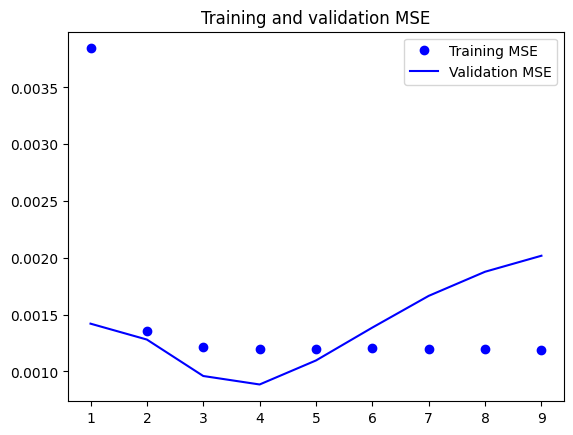

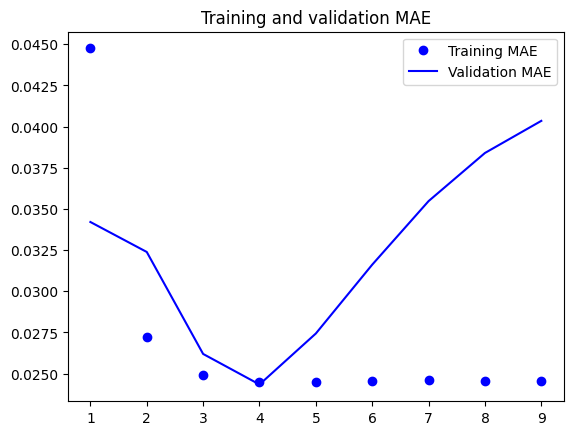

In [13]:

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MSE")
plt.plot(epochs, val_loss, "b", label="Validation MSE")
plt.title("Training and validation MSE")
plt.legend()
plt.show()
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

## 6 Hours Ahead

In [14]:
# Set Parameters

# delay: time in future that will be predicted
delay = 6


# sampling rate: period between timesteps within the sequence
# Sequence with rate=1 : t1,t2...tn
# Sequence with rate=3 : t1,t3...tn*3
sampling_rate = 2

# sequence length: sequence lenght of each sample 
sequence_length = 4 * 24


# sequence_stride: period between sequences
# First sequence starts at t0
# Second sequence will start at t1 with sequence_stride=1 or at t5 with sequence_stride=5
sequence_stride = 1

#batch_size: Number of timeseries samples in each batch (except maybe the last one). 
#If None, the data will not be batched (the dataset will yield individual samples).
# Huge impact in performance.
# Tip, should be multiple of 8
batch_size = 32

# Understanding our parameters
msg = f"The timeseries will consist of batches containing {batch_size} sequences of {sequence_length} samples."

msg += f"\nFinally our target is {delay} timesteps in the future, and will have data from {sequence_length * sampling_rate} timesteps in the past"
print(msg)

train_dataset = keras.preprocessing.timeseries_dataset_from_array(
                        raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False, # Shouldn't the shuffle be set to 0?
                    seed=33,
                    batch_size=batch_size,
                    start_index=0,
                    end_index=num_train_samples)

print("Done Train")

val_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False,
                    seed=33,
                    batch_size=batch_size,
                    start_index=num_train_samples,
                    end_index=num_train_samples + num_val_samples)

print("Done Validation")      

test_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False,
                    seed=33,
                    batch_size=batch_size,
                    start_index=num_train_samples + num_val_samples)

print("Done Test")

The timeseries will consist of batches containing 32 sequences of 96 samples.
Finally our target is 6 timesteps in the future, and will have data from 192 timesteps in the past
Done Train
Done Validation
Done Test


In [15]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(32)(inputs) 


outputs = layers.Dense(1)(x) #simoidal #con n clases neurnas y funcion softmax
model = keras.Model(inputs, outputs)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

callbacks = [
    keras.callbacks.ModelCheckpoint("models/lstm",
   save_best_only=True) 
]

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

history = model.fit(train_dataset,
                    epochs=100,
                    validation_data=val_dataset,
                    callbacks=[callbacks, early_stopping])

# Save the trained model to a file
model.save('lstm_model_6_ahead.h5')

Epoch 1/100


2023-05-04 17:12:02.472787: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 17:12:02.474474: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 17:12:02.475742: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

358/359 [============================>.] - ETA: 0s - loss: 0.0057 - mae: 0.0560

2023-05-04 17:12:17.982888: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [4666]
	 [[{{node Placeholder/_8}}]]
2023-05-04 17:12:17.983442: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype double and shape [4857,1]
	 [[{{node Placeholder/_20}}]]
2023-05-04 17:12:18.315356: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_di

359/359 [==============================] - 21s 53ms/step - loss: 0.0057 - mae: 0.0560 - val_loss: 0.0060 - val_mae: 0.0678
Epoch 2/100
359/359 [==============================] - ETA: 0s - loss: 0.0016 - mae: 0.0297

2023-05-04 17:12:37.974953: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 17:12:37.976844: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 17:12:37.978354: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

359/359 [==============================] - 18s 49ms/step - loss: 0.0016 - mae: 0.0297 - val_loss: 0.0022 - val_mae: 0.0400
Epoch 3/100
359/359 [==============================] - ETA: 0s - loss: 0.0013 - mae: 0.0259

2023-05-04 17:12:55.667862: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 17:12:55.669708: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 17:12:55.671215: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

359/359 [==============================] - 18s 50ms/step - loss: 0.0013 - mae: 0.0259 - val_loss: 0.0022 - val_mae: 0.0401
Epoch 4/100
359/359 [==============================] - 14s 38ms/step - loss: 0.0012 - mae: 0.0256 - val_loss: 0.0023 - val_mae: 0.0407
Epoch 5/100
359/359 [==============================] - 15s 41ms/step - loss: 0.0012 - mae: 0.0252 - val_loss: 0.0027 - val_mae: 0.0457
Epoch 6/100
359/359 [==============================] - 14s 39ms/step - loss: 0.0012 - mae: 0.0251 - val_loss: 0.0032 - val_mae: 0.0504
Epoch 7/100
359/359 [==============================] - 14s 40ms/step - loss: 0.0012 - mae: 0.0251 - val_loss: 0.0037 - val_mae: 0.0547
Epoch 8/100
359/359 [==============================] - 15s 41ms/step - loss: 0.0012 - mae: 0.0251 - val_loss: 0.0040 - val_mae: 0.0576


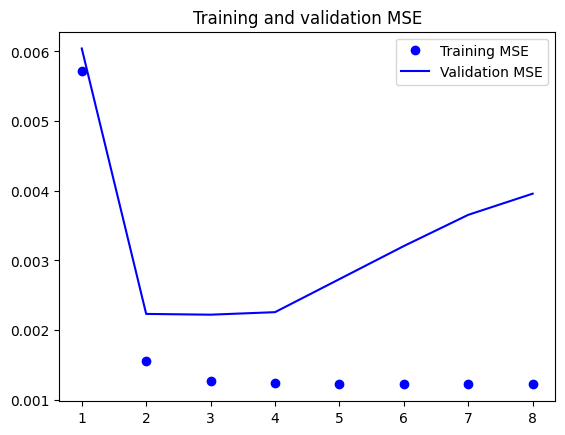

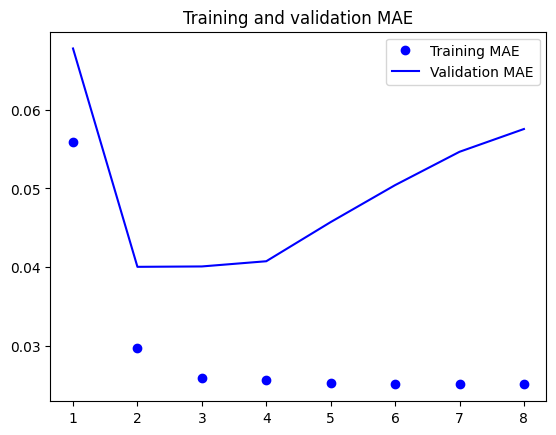

In [16]:

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MSE")
plt.plot(epochs, val_loss, "b", label="Validation MSE")
plt.title("Training and validation MSE")
plt.legend()
plt.show()
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

## 12 Ahead

In [17]:
# Set Parameters

# delay: time in future that will be predicted
delay = 12


# sampling rate: period between timesteps within the sequence
# Sequence with rate=1 : t1,t2...tn
# Sequence with rate=3 : t1,t3...tn*3
sampling_rate = 3

# sequence length: sequence lenght of each sample 
sequence_length = 4 * 24


# sequence_stride: period between sequences
# First sequence starts at t0
# Second sequence will start at t1 with sequence_stride=1 or at t5 with sequence_stride=5
sequence_stride = 1

#batch_size: Number of timeseries samples in each batch (except maybe the last one). 
#If None, the data will not be batched (the dataset will yield individual samples).
# Huge impact in performance.
# Tip, should be multiple of 8
batch_size = 32

# Understanding our parameters
msg = f"The timeseries will consist of batches containing {batch_size} sequences of {sequence_length} samples."

msg += f"\nFinally our target is {delay} timesteps in the future, and will have data from {sequence_length * sampling_rate} timesteps in the past"
print(msg)

train_dataset = keras.preprocessing.timeseries_dataset_from_array(
                        raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False, # Shouldn't the shuffle be set to 0?
                    seed=33,
                    batch_size=batch_size,
                    start_index=0,
                    end_index=num_train_samples)

print("Done Train")

val_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False,
                    seed=33,
                    batch_size=batch_size,
                    start_index=num_train_samples,
                    end_index=num_train_samples + num_val_samples)

print("Done Validation")      

test_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False,
                    seed=33,
                    batch_size=batch_size,
                    start_index=num_train_samples + num_val_samples)

print("Done Test")

The timeseries will consist of batches containing 32 sequences of 96 samples.
Finally our target is 12 timesteps in the future, and will have data from 288 timesteps in the past
Done Train
Done Validation
Done Test


In [18]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(32)(inputs) 


outputs = layers.Dense(1)(x) #simoidal #con n clases neurnas y funcion softmax
model = keras.Model(inputs, outputs)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

callbacks = [
    keras.callbacks.ModelCheckpoint("models/lstm",
   save_best_only=True) 
]

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

history = model.fit(train_dataset,
                    epochs=100,
                    validation_data=val_dataset,
                    callbacks=[callbacks, early_stopping])

# Save the trained model to a file
model.save('lstm_model_12_ahead.h5')

Epoch 1/100


2023-05-04 17:14:17.567175: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 17:14:17.568932: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 17:14:17.570275: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

356/356 [==============================] - ETA: 0s - loss: 0.0052 - mae: 0.0515

2023-05-04 17:14:31.037849: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [4570]
	 [[{{node Placeholder/_28}}]]
2023-05-04 17:14:31.038567: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [4570]
	 [[{{node Placeholder/_28}}]]
2023-05-04 17:14:31.366583: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim

356/356 [==============================] - 20s 50ms/step - loss: 0.0052 - mae: 0.0515 - val_loss: 0.0014 - val_mae: 0.0304
Epoch 2/100
356/356 [==============================] - ETA: 0s - loss: 0.0015 - mae: 0.0289

2023-05-04 17:14:49.890575: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 17:14:49.892371: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 17:14:49.893855: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

356/356 [==============================] - 16s 46ms/step - loss: 0.0015 - mae: 0.0289 - val_loss: 0.0011 - val_mae: 0.0265
Epoch 3/100
356/356 [==============================] - 15s 41ms/step - loss: 0.0014 - mae: 0.0267 - val_loss: 0.0011 - val_mae: 0.0278
Epoch 4/100
356/356 [==============================] - 14s 39ms/step - loss: 0.0014 - mae: 0.0261 - val_loss: 0.0013 - val_mae: 0.0304
Epoch 5/100
356/356 [==============================] - 14s 38ms/step - loss: 0.0014 - mae: 0.0258 - val_loss: 0.0013 - val_mae: 0.0312
Epoch 6/100
356/356 [==============================] - 14s 40ms/step - loss: 0.0013 - mae: 0.0254 - val_loss: 0.0014 - val_mae: 0.0332
Epoch 7/100
356/356 [==============================] - 13s 38ms/step - loss: 0.0013 - mae: 0.0252 - val_loss: 0.0016 - val_mae: 0.0361


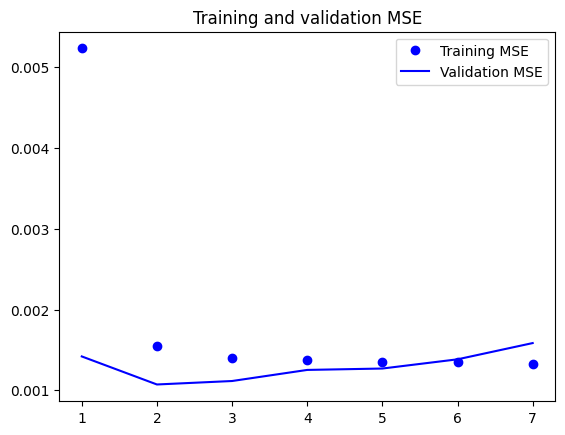

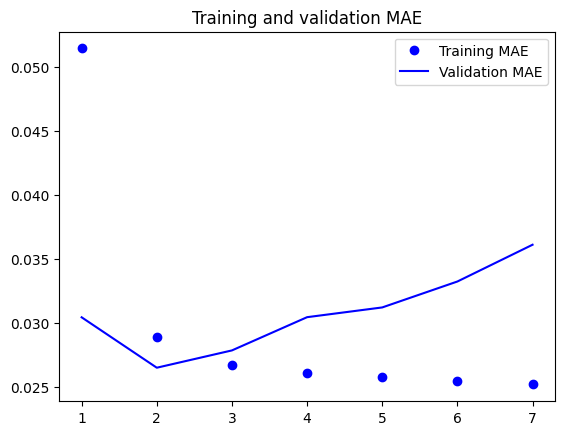

In [19]:

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MSE")
plt.plot(epochs, val_loss, "b", label="Validation MSE")
plt.title("Training and validation MSE")
plt.legend()
plt.show()
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

## 1 Day Ahead

In [20]:
# Set Parameters

# delay: time in future that will be predicted
delay = 24


# sampling rate: period between timesteps within the sequence
# Sequence with rate=1 : t1,t2...tn
# Sequence with rate=3 : t1,t3...tn*3
sampling_rate = 2

# sequence length: sequence lenght of each sample 
sequence_length = 4 * 24


# sequence_stride: period between sequences
# First sequence starts at t0
# Second sequence will start at t1 with sequence_stride=1 or at t5 with sequence_stride=5
sequence_stride = 1

#batch_size: Number of timeseries samples in each batch (except maybe the last one). 
#If None, the data will not be batched (the dataset will yield individual samples).
# Huge impact in performance.
# Tip, should be multiple of 8
batch_size = 32

# Understanding our parameters
msg = f"The timeseries will consist of batches containing {batch_size} sequences of {sequence_length} samples."

msg += f"\nFinally our target is {delay} timesteps in the future, and will have data from {sequence_length * sampling_rate} timesteps in the past"
print(msg)

train_dataset = keras.preprocessing.timeseries_dataset_from_array(
                        raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False, # Shouldn't the shuffle be set to 0?
                    seed=33,
                    batch_size=batch_size,
                    start_index=0,
                    end_index=num_train_samples)

print("Done Train")

val_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False,
                    seed=33,
                    batch_size=batch_size,
                    start_index=num_train_samples,
                    end_index=num_train_samples + num_val_samples)

print("Done Validation")      

test_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False,
                    seed=33,
                    batch_size=batch_size,
                    start_index=num_train_samples + num_val_samples)

print("Done Test")

The timeseries will consist of batches containing 32 sequences of 96 samples.
Finally our target is 24 timesteps in the future, and will have data from 192 timesteps in the past
Done Train
Done Validation
Done Test


In [21]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(32)(inputs) 


outputs = layers.Dense(1)(x) #simoidal #con n clases neurnas y funcion softmax
model = keras.Model(inputs, outputs)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

callbacks = [
    keras.callbacks.ModelCheckpoint("models/lstm",
   save_best_only=True) 
]

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

history = model.fit(train_dataset,
                    epochs=100,
                    validation_data=val_dataset,
                    callbacks=[callbacks, early_stopping])

# Save the trained model to a file
model.save('lstm_model_24_ahead.h5')

Epoch 1/100


2023-05-04 17:16:04.238609: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 17:16:04.240197: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 17:16:04.241467: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

359/359 [==============================] - ETA: 0s - loss: 0.0061 - mae: 0.0530

2023-05-04 17:16:19.506009: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2023-05-04 17:16:19.506580: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [4666]
	 [[{{node Placeholder/_8}}]]
2023-05-04 17:16:19.834560: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32


359/359 [==============================] - 22s 55ms/step - loss: 0.0061 - mae: 0.0530 - val_loss: 0.0011 - val_mae: 0.0273
Epoch 2/100
359/359 [==============================] - 14s 38ms/step - loss: 0.0016 - mae: 0.0303 - val_loss: 0.0017 - val_mae: 0.0343
Epoch 3/100
359/359 [==============================] - ETA: 0s - loss: 0.0014 - mae: 0.0272

2023-05-04 17:16:54.773647: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 17:16:54.777828: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 17:16:54.781350: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

359/359 [==============================] - 19s 52ms/step - loss: 0.0014 - mae: 0.0272 - val_loss: 6.7264e-04 - val_mae: 0.0205
Epoch 4/100
358/359 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0254

2023-05-04 17:17:13.430994: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 17:17:13.432855: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 17:17:13.434310: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

359/359 [==============================] - 18s 52ms/step - loss: 0.0012 - mae: 0.0254 - val_loss: 5.1103e-04 - val_mae: 0.0180
Epoch 5/100
359/359 [==============================] - 14s 40ms/step - loss: 0.0012 - mae: 0.0245 - val_loss: 5.2089e-04 - val_mae: 0.0184
Epoch 6/100
359/359 [==============================] - 14s 39ms/step - loss: 0.0011 - mae: 0.0239 - val_loss: 5.9563e-04 - val_mae: 0.0198
Epoch 7/100
359/359 [==============================] - 14s 40ms/step - loss: 0.0011 - mae: 0.0235 - val_loss: 7.1819e-04 - val_mae: 0.0222
Epoch 8/100
359/359 [==============================] - 14s 40ms/step - loss: 0.0010 - mae: 0.0230 - val_loss: 8.5703e-04 - val_mae: 0.0250
Epoch 9/100
359/359 [==============================] - 14s 40ms/step - loss: 0.0010 - mae: 0.0226 - val_loss: 9.8591e-04 - val_mae: 0.0277


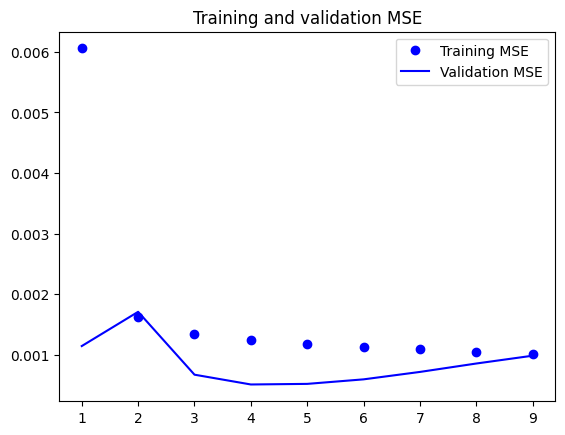

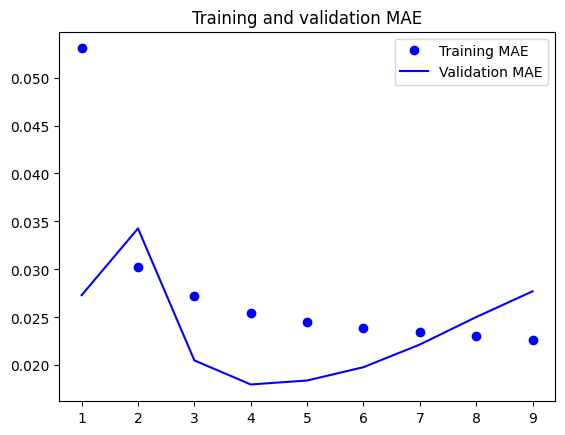

In [22]:

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MSE")
plt.plot(epochs, val_loss, "b", label="Validation MSE")
plt.title("Training and validation MSE")
plt.legend()
plt.show()
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

## 3 Days Ahead

In [23]:
# Set Parameters

# delay: time in future that will be predicted
delay = 3*24


# sampling rate: period between timesteps within the sequence
# Sequence with rate=1 : t1,t2...tn
# Sequence with rate=3 : t1,t3...tn*3
sampling_rate = 4

# sequence length: sequence lenght of each sample 
sequence_length = 5 * 24


# sequence_stride: period between sequences
# First sequence starts at t0
# Second sequence will start at t1 with sequence_stride=1 or at t5 with sequence_stride=5
sequence_stride = 1

#batch_size: Number of timeseries samples in each batch (except maybe the last one). 
#If None, the data will not be batched (the dataset will yield individual samples).
# Huge impact in performance.
# Tip, should be multiple of 8
batch_size = 32

# Understanding our parameters
msg = f"The timeseries will consist of batches containing {batch_size} sequences of {sequence_length} samples."

msg += f"\nFinally our target is {delay} timesteps in the future, and will have data from {sequence_length * sampling_rate} timesteps in the past"
print(msg)

train_dataset = keras.preprocessing.timeseries_dataset_from_array(
                        raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False, # Shouldn't the shuffle be set to 0?
                    seed=33,
                    batch_size=batch_size,
                    start_index=0,
                    end_index=num_train_samples)

print("Done Train")

val_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False,
                    seed=33,
                    batch_size=batch_size,
                    start_index=num_train_samples,
                    end_index=num_train_samples + num_val_samples)

print("Done Validation")      

test_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False,
                    seed=33,
                    batch_size=batch_size,
                    start_index=num_train_samples + num_val_samples)

print("Done Test")

The timeseries will consist of batches containing 32 sequences of 120 samples.
Finally our target is 72 timesteps in the future, and will have data from 480 timesteps in the past
Done Train
Done Validation
Done Test


In [24]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(32)(inputs) 


outputs = layers.Dense(1)(x) #simoidal #con n clases neurnas y funcion softmax
model = keras.Model(inputs, outputs)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

callbacks = [
    keras.callbacks.ModelCheckpoint("models/lstm",
   save_best_only=True) 
]

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

history = model.fit(train_dataset,
                    epochs=100,
                    validation_data=val_dataset,
                    callbacks=[callbacks, early_stopping])

# Save the trained model to a file
model.save('lstm_model_3d_ahead.h5')

2023-05-04 17:18:35.364730: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 17:18:35.366548: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 17:18:35.367978: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/100


2023-05-04 17:18:35.865554: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]
2023-05-04 17:18:35.866363: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [11179]
	 [[{{node Placeholder/_28}}]]
2023-05-04 17:18:36.210281: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int

350/350 [==============================] - ETA: 0s - loss: 0.0043 - mae: 0.0476

2023-05-04 17:18:52.760380: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]
2023-05-04 17:18:52.760943: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]
2023-05-04 17:18:53.110915: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node grad

350/350 [==============================] - 23s 60ms/step - loss: 0.0043 - mae: 0.0476 - val_loss: 4.7300e-04 - val_mae: 0.0179
Epoch 2/100
349/350 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0297

2023-05-04 17:19:15.225935: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 17:19:15.228523: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 17:19:15.229912: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

350/350 [==============================] - 20s 58ms/step - loss: 0.0015 - mae: 0.0297 - val_loss: 4.3186e-04 - val_mae: 0.0165
Epoch 3/100
350/350 [==============================] - 17s 49ms/step - loss: 0.0013 - mae: 0.0264 - val_loss: 6.3147e-04 - val_mae: 0.0210
Epoch 4/100
350/350 [==============================] - 17s 50ms/step - loss: 0.0013 - mae: 0.0254 - val_loss: 7.6067e-04 - val_mae: 0.0239
Epoch 5/100
350/350 [==============================] - 18s 50ms/step - loss: 0.0013 - mae: 0.0249 - val_loss: 7.8469e-04 - val_mae: 0.0247
Epoch 6/100
350/350 [==============================] - 17s 47ms/step - loss: 0.0012 - mae: 0.0246 - val_loss: 7.2708e-04 - val_mae: 0.0237
Epoch 7/100
350/350 [==============================] - 17s 48ms/step - loss: 0.0012 - mae: 0.0243 - val_loss: 6.4287e-04 - val_mae: 0.0220


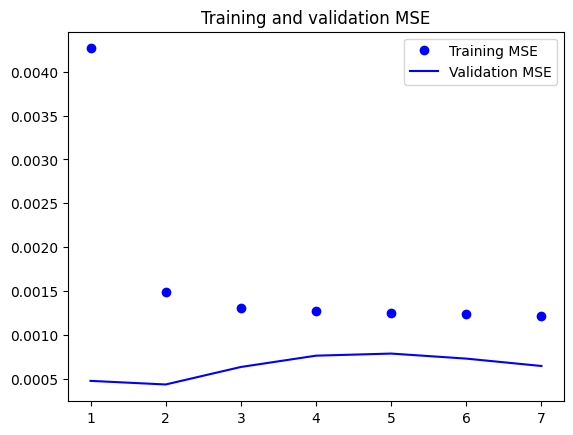

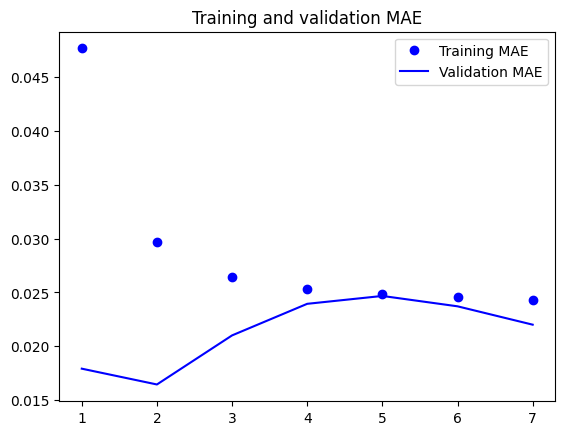

In [25]:

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MSE")
plt.plot(epochs, val_loss, "b", label="Validation MSE")
plt.title("Training and validation MSE")
plt.legend()
plt.show()
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

## 7 Days Ahead

In [26]:
# Set Parameters

# delay: time in future that will be predicted
delay = 7*24


# sampling rate: period between timesteps within the sequence
# Sequence with rate=1 : t1,t2...tn
# Sequence with rate=3 : t1,t3...tn*3
sampling_rate = 6

# sequence length: sequence lenght of each sample 
sequence_length = 5 * 24


# sequence_stride: period between sequences
# First sequence starts at t0
# Second sequence will start at t1 with sequence_stride=1 or at t5 with sequence_stride=5
sequence_stride = 1

#batch_size: Number of timeseries samples in each batch (except maybe the last one). 
#If None, the data will not be batched (the dataset will yield individual samples).
# Huge impact in performance.
# Tip, should be multiple of 8
batch_size = 32

# Understanding our parameters
msg = f"The timeseries will consist of batches containing {batch_size} sequences of {sequence_length} samples."

msg += f"\nFinally our target is {delay} timesteps in the future, and will have data from {sequence_length * sampling_rate} timesteps in the past"
print(msg)

train_dataset = keras.preprocessing.timeseries_dataset_from_array(
                        raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False, # Shouldn't the shuffle be set to 0?
                    seed=33,
                    batch_size=batch_size,
                    start_index=0,
                    end_index=num_train_samples)

print("Done Train")

val_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False,
                    seed=33,
                    batch_size=batch_size,
                    start_index=num_train_samples,
                    end_index=num_train_samples + num_val_samples)

print("Done Validation")      

test_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False,
                    seed=33,
                    batch_size=batch_size,
                    start_index=num_train_samples + num_val_samples)

print("Done Test")

The timeseries will consist of batches containing 32 sequences of 120 samples.
Finally our target is 168 timesteps in the future, and will have data from 720 timesteps in the past
Done Train
Done Validation
Done Test


In [27]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(32)(inputs) 


outputs = layers.Dense(1)(x) #simoidal #con n clases neurnas y funcion softmax
model = keras.Model(inputs, outputs)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

callbacks = [
    keras.callbacks.ModelCheckpoint("models/lstm",
   save_best_only=True) 
]

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

history = model.fit(train_dataset,
                    epochs=100,
                    validation_data=val_dataset,
                    callbacks=[callbacks, early_stopping])

# Save the trained model to a file
model.save('lstm_model_7d_ahead.h5')

Epoch 1/100


2023-05-04 17:20:46.111428: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 17:20:46.113080: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 17:20:46.114488: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

342/342 [==============================] - ETA: 0s - loss: 0.0036 - mae: 0.0445

2023-05-04 17:21:02.336633: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [4138]
	 [[{{node Placeholder/_8}}]]
2023-05-04 17:21:02.337171: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [4857,72]
	 [[{{node Placeholder/_0}}]]
2023-05-04 17:21:02.655105: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim

342/342 [==============================] - 22s 59ms/step - loss: 0.0036 - mae: 0.0445 - val_loss: 0.0030 - val_mae: 0.0508
Epoch 2/100
342/342 [==============================] - ETA: 0s - loss: 0.0013 - mae: 0.0277

2023-05-04 17:21:24.754788: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 17:21:24.756740: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 17:21:24.758382: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

342/342 [==============================] - 20s 60ms/step - loss: 0.0013 - mae: 0.0277 - val_loss: 0.0023 - val_mae: 0.0442
Epoch 3/100
342/342 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0255

2023-05-04 17:21:44.065310: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 17:21:44.067259: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 17:21:44.068726: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

342/342 [==============================] - 19s 55ms/step - loss: 0.0012 - mae: 0.0255 - val_loss: 0.0015 - val_mae: 0.0353
Epoch 4/100
342/342 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0249

2023-05-04 17:22:03.305834: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 17:22:03.307632: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 17:22:03.309096: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

342/342 [==============================] - 18s 51ms/step - loss: 0.0012 - mae: 0.0249 - val_loss: 0.0010 - val_mae: 0.0280
Epoch 5/100
342/342 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0246

2023-05-04 17:22:23.329437: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 17:22:23.331501: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 17:22:23.332906: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

342/342 [==============================] - 20s 60ms/step - loss: 0.0012 - mae: 0.0246 - val_loss: 7.6687e-04 - val_mae: 0.0235
Epoch 6/100
342/342 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0244

2023-05-04 17:22:43.584647: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 17:22:43.586513: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 17:22:43.587928: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

342/342 [==============================] - 20s 58ms/step - loss: 0.0012 - mae: 0.0244 - val_loss: 6.3247e-04 - val_mae: 0.0212
Epoch 7/100
341/342 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0243

2023-05-04 17:23:05.053907: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 17:23:05.055767: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 17:23:05.057200: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

342/342 [==============================] - 21s 62ms/step - loss: 0.0012 - mae: 0.0243 - val_loss: 5.7191e-04 - val_mae: 0.0199
Epoch 8/100
342/342 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0242

2023-05-04 17:23:26.385613: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 17:23:26.387596: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 17:23:26.389184: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

342/342 [==============================] - 21s 62ms/step - loss: 0.0012 - mae: 0.0242 - val_loss: 5.6037e-04 - val_mae: 0.0193
Epoch 9/100
342/342 [==============================] - 17s 50ms/step - loss: 0.0012 - mae: 0.0241 - val_loss: 5.7422e-04 - val_mae: 0.0191
Epoch 10/100
342/342 [==============================] - 17s 49ms/step - loss: 0.0012 - mae: 0.0241 - val_loss: 5.9954e-04 - val_mae: 0.0193
Epoch 11/100
342/342 [==============================] - 13s 39ms/step - loss: 0.0012 - mae: 0.0240 - val_loss: 6.2828e-04 - val_mae: 0.0195
Epoch 12/100
342/342 [==============================] - 14s 40ms/step - loss: 0.0012 - mae: 0.0240 - val_loss: 6.6264e-04 - val_mae: 0.0199
Epoch 13/100
342/342 [==============================] - 14s 40ms/step - loss: 0.0012 - mae: 0.0240 - val_loss: 6.9840e-04 - val_mae: 0.0204


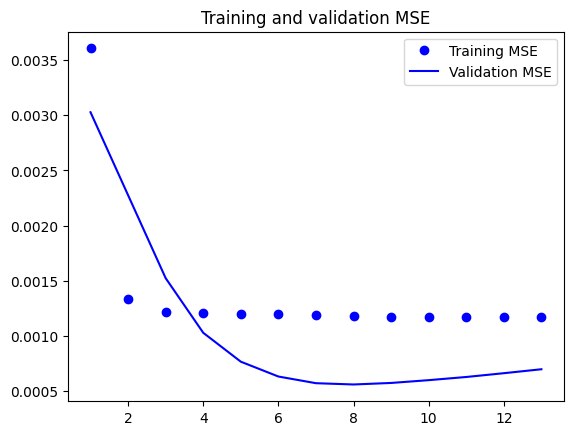

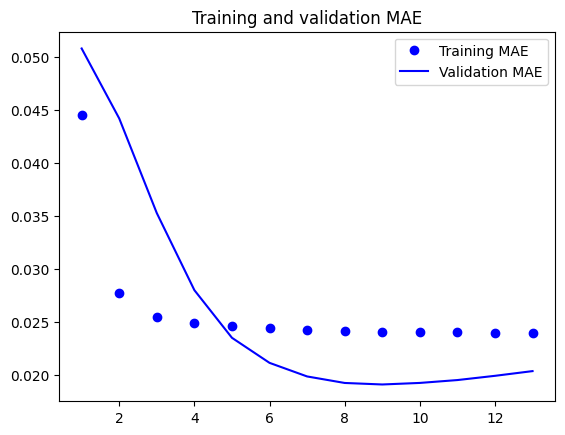

In [28]:

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MSE")
plt.plot(epochs, val_loss, "b", label="Validation MSE")
plt.title("Training and validation MSE")
plt.legend()
plt.show()
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()